In [1]:
#!pip uninstall scikit-learn --yes
#!pip uninstall imblearn --yes
#!pip install scikit-learn==1.2.2
#!pip install imblearn

In [2]:
#models
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#utilities
import numpy as np
import pandas as pd
import joblib
#from joblib import dump

#pre-processing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#evaluation
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, precision_score, recall_score, confusion_matrix, classification_report

loading csv:

In [3]:
df = pd.read_csv('final.csv') #down scaled big dataset
test2 = pd.read_csv('final_external_test.csv') #dikie benigns and virusshare malwares combined (2k total)

In [4]:
df

malware   entropy   length  number_of_sections  time_date_stamp  \
0            0  6.532305  1034752                   5       1283967909   
1            0  5.816818    37712                   8       1936682083   
2            0  5.878196   385560                   5       1253732028   
3            0  6.133865    76512                   6       1355834642   
4            0  5.484436    22016                   3       1458569336   
...        ...       ...      ...                 ...              ...   
10084        1  6.495499  2261129                   8        708992537   
10085        1  6.486860  2261131                   8        708992537   
10086        1  6.488914  2261105                   8        708992537   
10087        1  7.654811  2738587                   3       1504708224   
10088        1  7.260422   679936                   6       1555406679   

       characteristics  dll_characteristics  import_count  checksum_invalid  
0                  258                33088           173                 0  
1                  551                32768            68                 0  
2                   35                32768           192                 0  
3                   34                33088            65                 0  
4                 8450                34144             1                 0  
...                ...                  ...           ...               ...  
10084            33166                    0           426                 1  
10085            33166                    0           426                 1  
10086            33166                    0           426                 1  
10087              271                    0           108                 1  
10088              259                33024            67                 1  

[10089 rows x 9 columns]

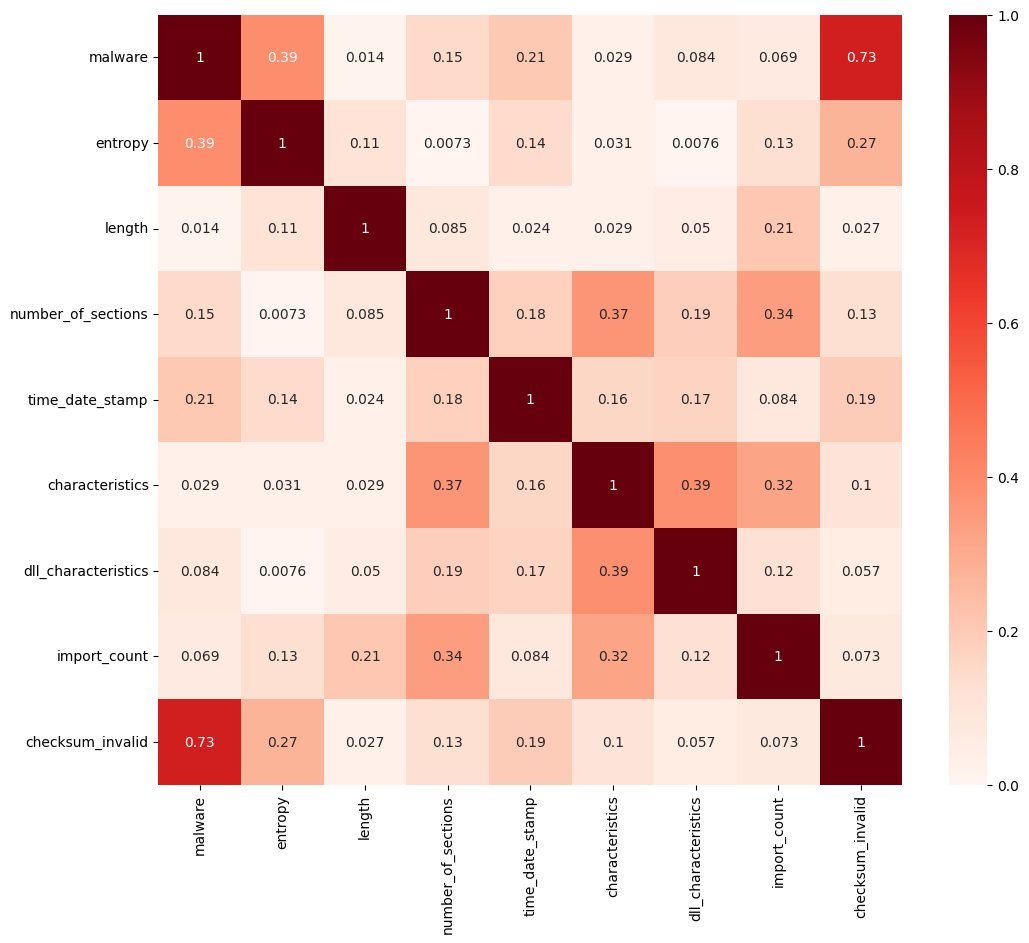

In [5]:
plt.figure(figsize=(12,10))
cor = np.abs(df.corr()) #absolute, doesnt matter if its negative or positive correlation
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

In [6]:
t = df['malware']
X = df.drop('malware', axis=1)

t_test = test2['malware']
X_test = test2.drop(columns=['malware'])

X_train = X
t_train = t


#X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=42) #uncomment to test against validation (will overwite the groups that fit for external test)

In [7]:
# Apply resampling only on the training data
smote = SMOTE(random_state=42)
#X_train, t_train = smote.fit_resample(X_train, t_train) #uncomment if using validation (and uncomment the train_test_split from cell above)

In [8]:
# Initialize the StandardScaler
print(X_train.iloc[0])
X_train = X_train.values
X_test = X_test.values
standard_scaler = StandardScaler()
print(X_train[0])
# Fit the scaler on the training data (X_train) and then transform it
X_train = standard_scaler.fit_transform(X_train)

# Transform the test data (X_test) using the same scaler that was fit on the train
X_test = standard_scaler.transform(X_test)

entropy                6.532305e+00
length                 1.034752e+06
number_of_sections     5.000000e+00
time_date_stamp        1.283968e+09
characteristics        2.580000e+02
dll_characteristics    3.308800e+04
import_count           1.730000e+02
checksum_invalid       0.000000e+00
Name: 0, dtype: float64
[6.53230526e+00 1.03475200e+06 5.00000000e+00 1.28396791e+09
 2.58000000e+02 3.30880000e+04 1.73000000e+02 0.00000000e+00]


In [9]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, t_train)

# Save the model to disk
joblib.dump(clf, 'random_forest_model.joblib')

#save scaler to disk
joblib.dump(standard_scaler, 'scaler.joblib')

['scaler.joblib']

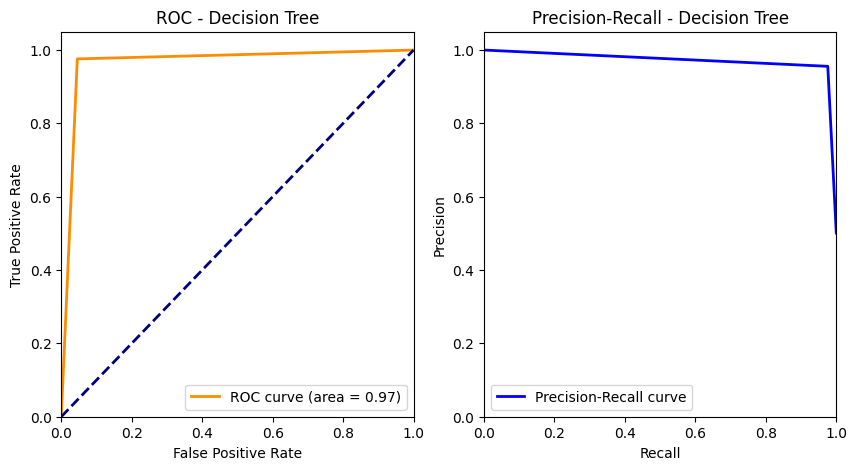

Decision Tree - Confusion Matrix:
[[4805  229]
 [ 122 4933]]

Decision Tree - Precision: 0.96, Recall (Sensitivity): 0.98, F1 Score: 0.97

Decision Tree - Sensitivity: 0.98, Specificity: 0.95, FPR: 0.05



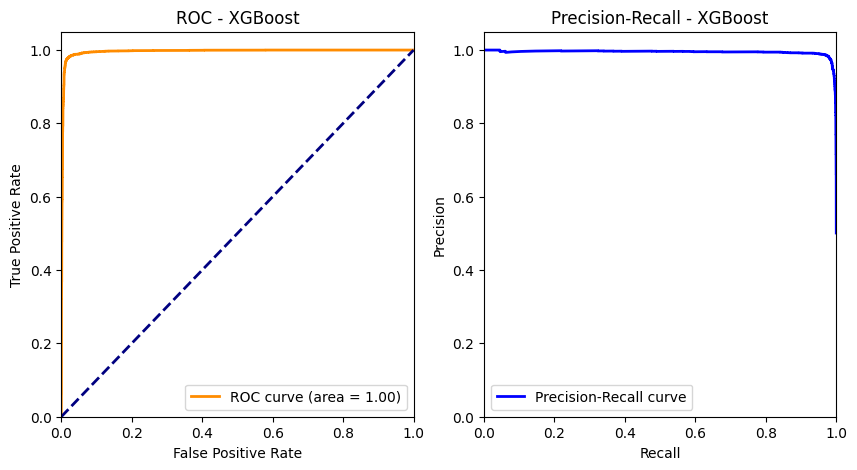

XGBoost - Confusion Matrix:
[[4886  148]
 [  73 4982]]

XGBoost - Precision: 0.97, Recall (Sensitivity): 0.99, F1 Score: 0.98

XGBoost - Sensitivity: 0.99, Specificity: 0.97, FPR: 0.03



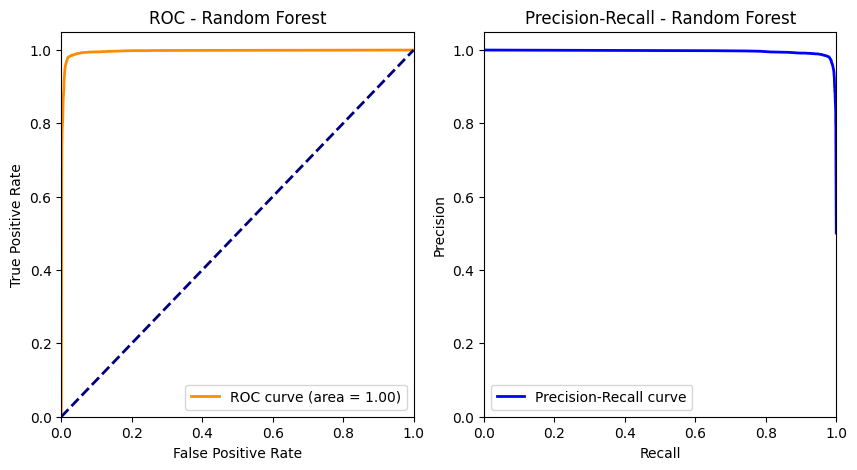

Random Forest - Confusion Matrix:
[[4900  134]
 [  79 4976]]

Random Forest - Precision: 0.97, Recall (Sensitivity): 0.98, F1 Score: 0.98

Random Forest - Sensitivity: 0.98, Specificity: 0.97, FPR: 0.03



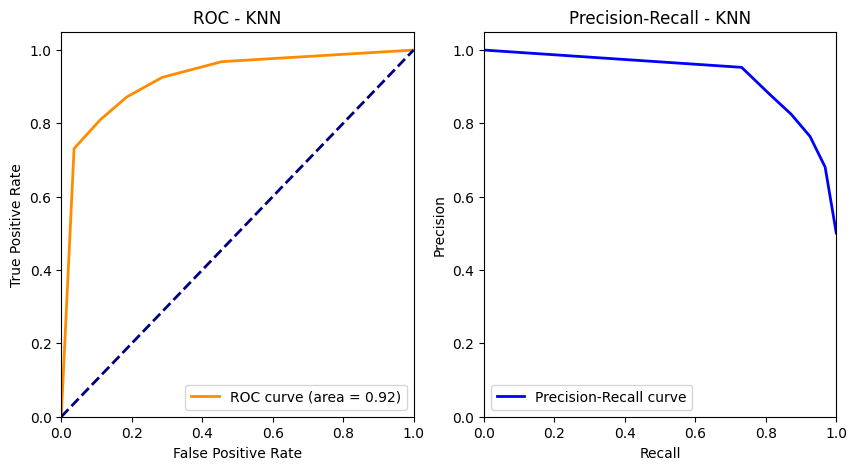

KNN - Confusion Matrix:
[[4097  937]
 [ 646 4409]]

KNN - Precision: 0.82, Recall (Sensitivity): 0.87, F1 Score: 0.85

KNN - Sensitivity: 0.87, Specificity: 0.81, FPR: 0.19



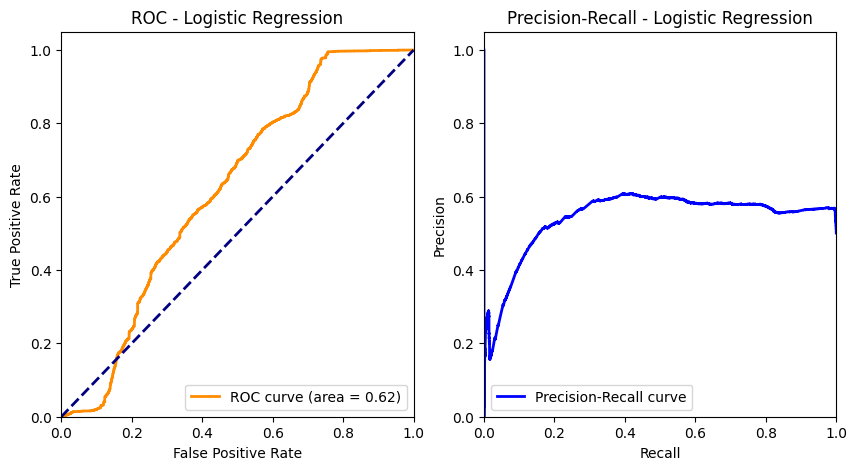

Logistic Regression - Confusion Matrix:
[[4655  379]
 [4975   80]]

Logistic Regression - Precision: 0.17, Recall (Sensitivity): 0.02, F1 Score: 0.03

Logistic Regression - Sensitivity: 0.02, Specificity: 0.92, FPR: 0.08



In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold


# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(random_state=0),
    "SVM": SVC(random_state=0, probability=True)  # Ensure probability is True for ROC curves
}

# Setting up 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5)

# Function to plot ROC and Precision-Recall curves
def plot_curves(fpr, tpr, model_name, roc_auc, precision, recall):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC - {model_name}')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall - {model_name}')
    plt.legend(loc="lower left")
    plt.show()

# Evaluate each classifier
for name, clf in classifiers.items():
    t_pred_prob = cross_val_predict(clf, X, t, cv=cv, method='predict_proba')[:, 1]
    t_pred = cross_val_predict(clf, X, t, cv=cv, method='predict')

    fpr, tpr, _ = roc_curve(t, t_pred_prob)
    roc_auc = auc(fpr, tpr)
    precision, recall, _ = precision_recall_curve(t, t_pred_prob)

    plot_curves(fpr, tpr, name, roc_auc, precision, recall)

    cm = confusion_matrix(t, t_pred)
    sensitivity = recall_score(t, t_pred)  # Recall is the same as sensitivity
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # Specificity calculation
    fpr_metric = 1 - specificity  # Calculating False Positive Rate

    print(f"{name} - Confusion Matrix:\n{cm}\n")
    print(f"{name} - Precision: {precision_score(t, t_pred):.2f}, Recall (Sensitivity): {sensitivity:.2f}, F1 Score: {f1_score(t, t_pred):.2f}\n")
    print(f"{name} - Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}, FPR: {fpr_metric:.2f}\n")


In [ ]:
# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(random_state=0),
     "SVM": SVC(random_state=0)
}

# Function to plot ROC and Precision-Recall curves
def plot_curves(fpr, tpr, model_name, roc_auc, precision, recall):
    # ROC Curve
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC - {model_name}')
    plt.legend(loc="lower right")

    # Precision-Recall Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall - {model_name}')
    plt.legend(loc="lower left")
    plt.show()

# Loop through classifiers to train, predict, and plot curves
for name, clf in classifiers.items():
    clf.fit(X_train, t_train)
    t_pred = clf.predict(X_test)
    t_pred_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(t_test, t_pred_prob)
    roc_auc = auc(fpr, tpr)
    plot_curves(fpr, tpr, name, roc_auc, *precision_recall_curve(t_test, t_pred_prob)[:2])

    # Confusion Matrix
    cm = confusion_matrix(t_test, t_pred)
    print(f"{name} - Confusion Matrix:\n{cm}\n")

    # Precision, Recall, F1 Score
    precision = precision_score(t_test, t_pred)
    recall = recall_score(t_test, t_pred)
    f1 = f1_score(t_test, t_pred)
    print(f"{name} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}\n")

    # Sensitivity and Specificity
    sensitivity = recall  # Recall is the same as sensitivity
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    fpr_metric = 1 - specificity  # Calculating False Positive Rate
    print(f"{name} - Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}, FPR: {fpr_metric:.2f}\n")


In [ ]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Logistic Regression": LogisticRegression(random_state=0),
}

# Creating the ensemble classifier with soft voting
voting_clf = VotingClassifier(estimators=[(name, clf) for name, clf in classifiers.items()], voting='soft')

# Fit the ensemble classifier
voting_clf.fit(X_train, t_train)

# Predict probabilities and classes
voting_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
voting_pred = voting_clf.predict(X_test)

# Compute metrics and plot ROC curve
fpr, tpr, _ = roc_curve(t_test, voting_pred_prob)
roc_auc = auc(fpr, tpr)
plot_curves(fpr, tpr, "Voting Ensemble", roc_auc, *precision_recall_curve(t_test, voting_pred_prob)[:2])

# Confusion Matrix and classification report
print(f"Voting Ensemble - Confusion Matrix:\n{confusion_matrix(t_test, voting_pred)}\n")
print(f"Voting Ensemble - Classification Report:\n{classification_report(t_test, voting_pred)}\n")